# Step 1: Data Preprocessing

In [7]:
# Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('EmployeePerformanceAnalysis.csv', encoding='UTF-8-SIG')

In [2]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
# Display the first few rows of the dataset
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
# Check for missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Display summary statistics
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

# Step 2. Exploratory Data Analysis (EDA)

In [23]:
# Set up the plotting style
plt.style.use('seaborn')
sns.set_palette('Set2')

C:\Users\Admin\AppData\Local\Temp\ipykernel_18452\4019356746.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 1. Distribution of Age

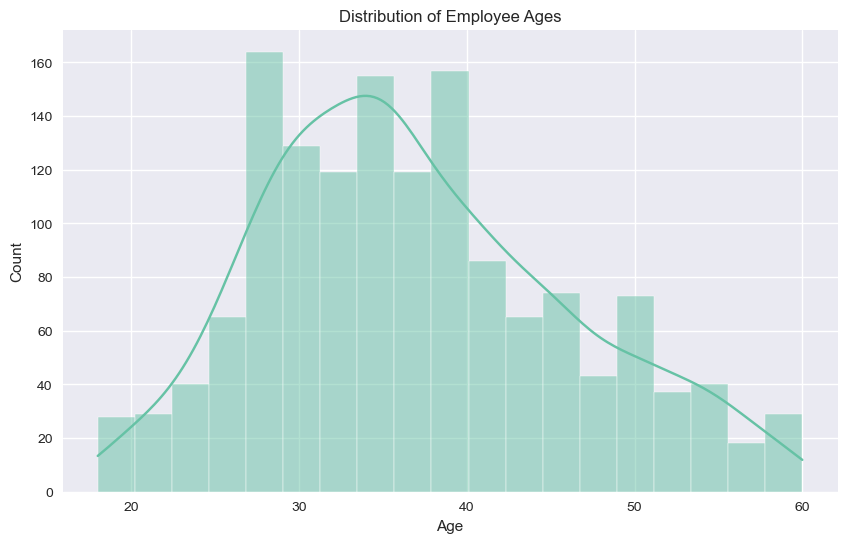

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_distribution.png')
plt.show()

### 2. Job Satisfaction by Department

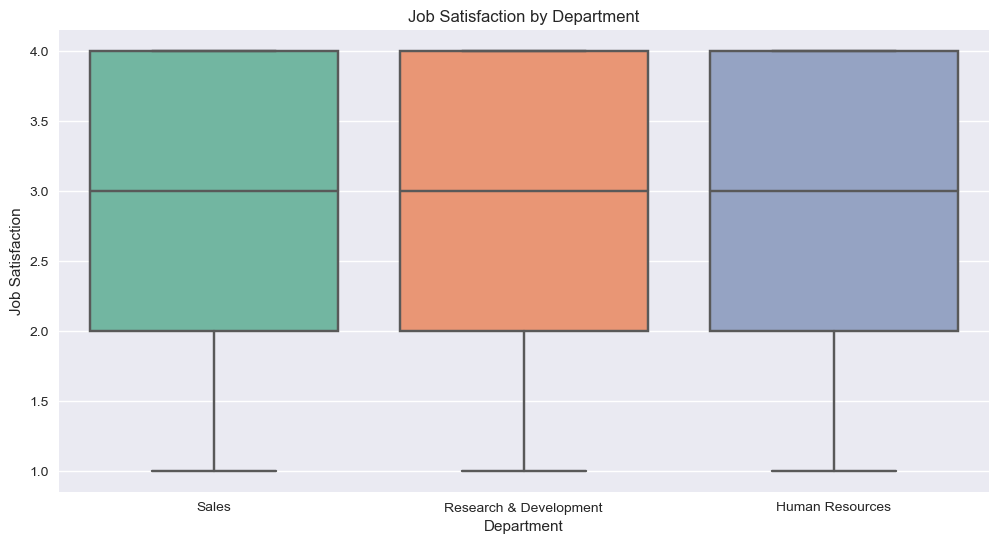

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Job Satisfaction')
plt.savefig('job_satisfaction_by_department.png')
plt.show()

### 3. Correlation heatmap of numerical variables

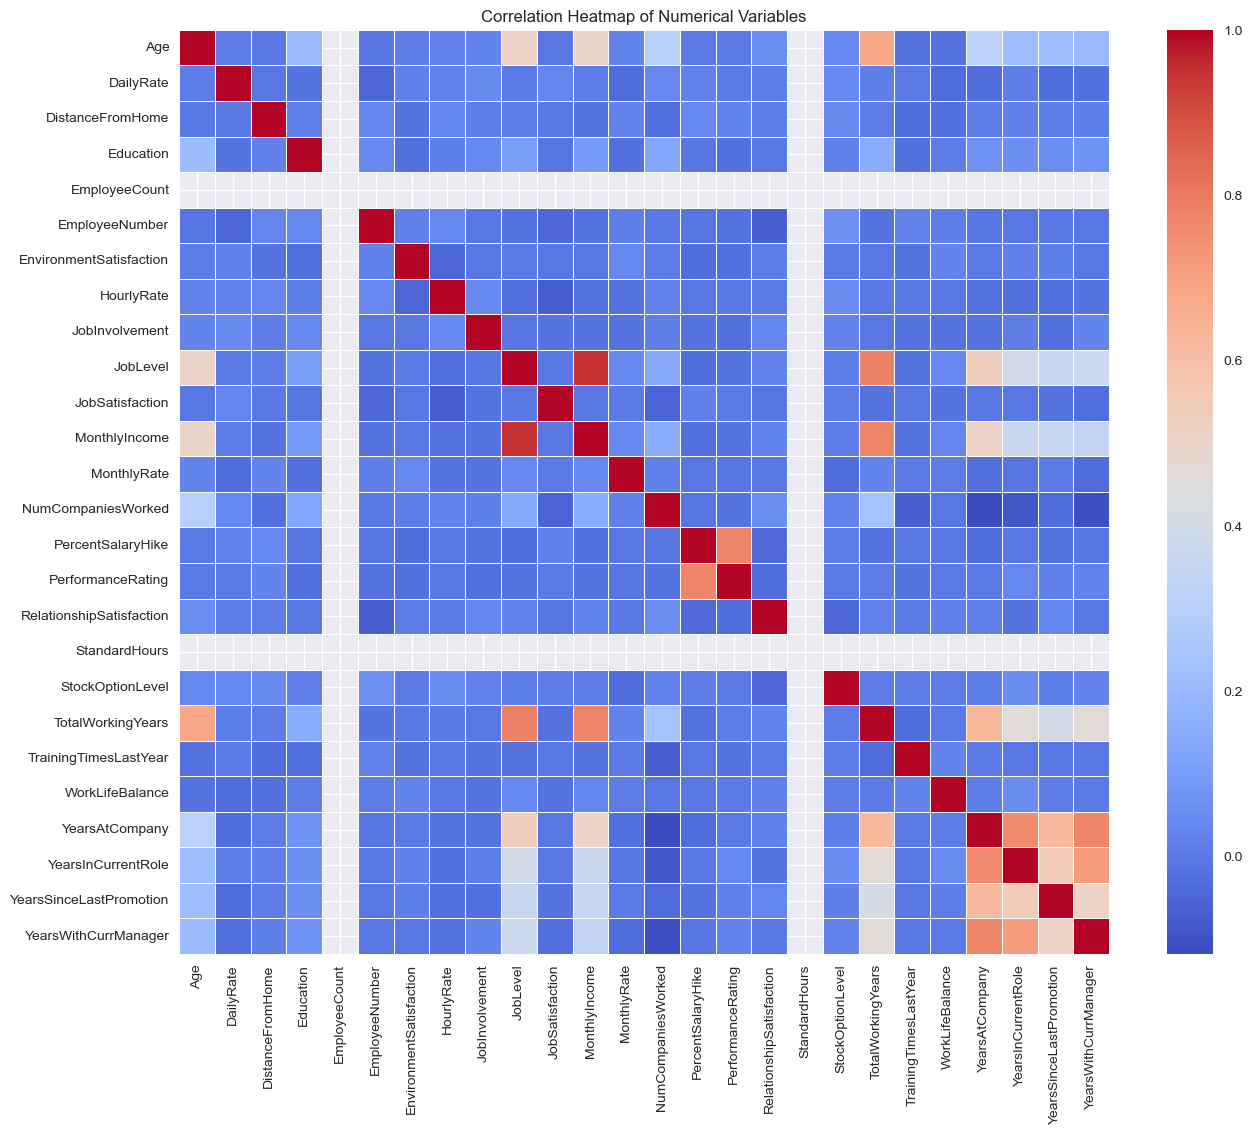

In [26]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.savefig('correlation_heatmap.png')
plt.show()

### 4. Attrition Rate

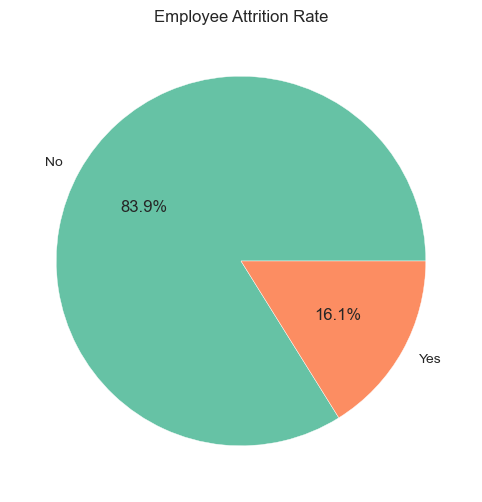

In [27]:
attrition_rate = df['Attrition'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
attrition_rate.plot(kind='pie', autopct='%1.1f%%')
plt.title('Employee Attrition Rate')
plt.ylabel('')
plt.savefig('attrition_rate.png')
plt.show()

### 5. Monthly Income by Job Role

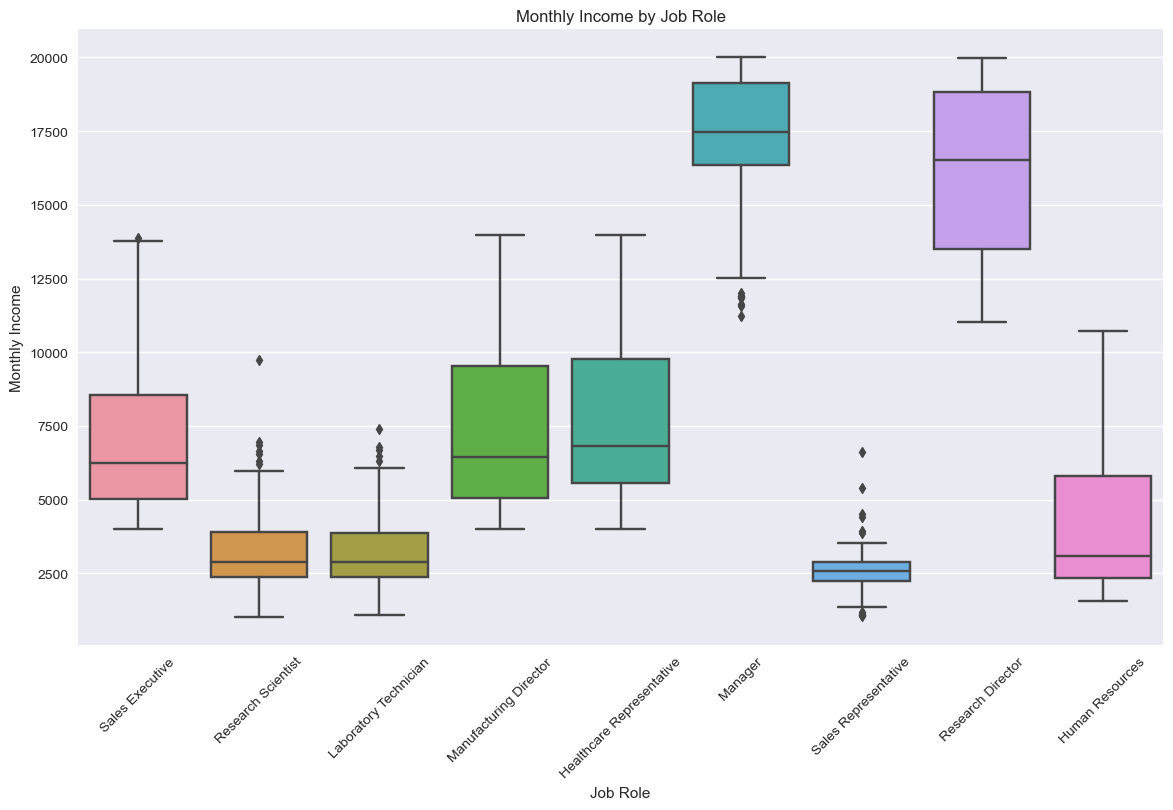

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.savefig('income_by_job_role.png')
plt.show()

In [29]:
print('Exploratory Data Analysis completed. Visualizations saved as PNG files.')

# Display summary statistics for key numerical variables
print(df[['Age', 'MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance']].describe())

# Calculate correlation between key variables
key_variables = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany', 'PerformanceRating']
print(df[key_variables].corr())

Exploratory Data Analysis completed. Visualizations saved as PNG files.
               Age  MonthlyIncome  JobSatisfaction  WorkLifeBalance
count  1470.000000    1470.000000      1470.000000      1470.000000
mean     36.923810    6502.931293         2.728571         2.761224
std       9.135373    4707.956783         1.102846         0.706476
min      18.000000    1009.000000         1.000000         1.000000
25%      30.000000    2911.000000         2.000000         2.000000
50%      36.000000    4919.000000         3.000000         3.000000
75%      43.000000    8379.000000         4.000000         3.000000
max      60.000000   19999.000000         4.000000         4.000000
                        Age  MonthlyIncome  JobSatisfaction  WorkLifeBalance  \
Age                1.000000       0.497855        -0.004892        -0.021490   
MonthlyIncome      0.497855       1.000000        -0.007157         0.030683   
JobSatisfaction   -0.004892      -0.007157         1.000000        -0.019459

# Step 3. Regression Analysis

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Select features for regression
features = ['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'Department']
target = 'MonthlyIncome'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany']),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['Department'])
    ])

# Create a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 2271342.405088809
R-squared Score: 0.8960741279383015


# Step 4. Sentiment Analysis

In [34]:
# Assuming the model, X, and y variables are still in memory from the previous execution

# Get feature names after preprocessing
numeric_features = ['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany']
categorical_features = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['Department'])
feature_names = numeric_features + list(categorical_features)

# Get coefficients
coefficients = model.named_steps['regressor'].coef_

# Create a dataframe of features and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

print('Top 5 most influential features:')
print(coef_df.head())

Top 5 most influential features:
                             Feature  Coefficient
1                           JobLevel  3876.684681
5                   Department_Sales  -552.664213
4  Department_Research & Development  -179.425486
2                  TotalWorkingYears    53.396731
3                     YearsAtCompany   -15.227495


In [37]:
print('\
Feature importances visualization saved as feature_importances.png')

# Sentiment Analysis (basic approach using job satisfaction as a proxy for sentiment)
df['Sentiment'] = pd.cut(df['JobSatisfaction'], 
                         bins=[0, 2, 3, 5], 
                         labels=['Negative', 'Neutral', 'Positive'])

sentiment_by_role = df.groupby('JobRole')['Sentiment'].value_counts(normalize=True).unstack()
print('\
Sentiment Analysis by Job Role:')
print(sentiment_by_role)

Feature importances visualization saved as feature_importances.png
Sentiment Analysis by Job Role:
Sentiment                  Negative   Neutral  Positive
JobRole                                                
Healthcare Representative  0.343511  0.328244  0.328244
Human Resources            0.500000  0.250000  0.250000
Laboratory Technician      0.401544  0.289575  0.308880
Manager                    0.411765  0.264706  0.323529
Manufacturing Director     0.400000  0.337931  0.262069
Research Director          0.387500  0.337500  0.275000
Research Scientist         0.366438  0.308219  0.325342
Sales Executive            0.377301  0.279141  0.343558
Sales Representative       0.397590  0.325301  0.277108


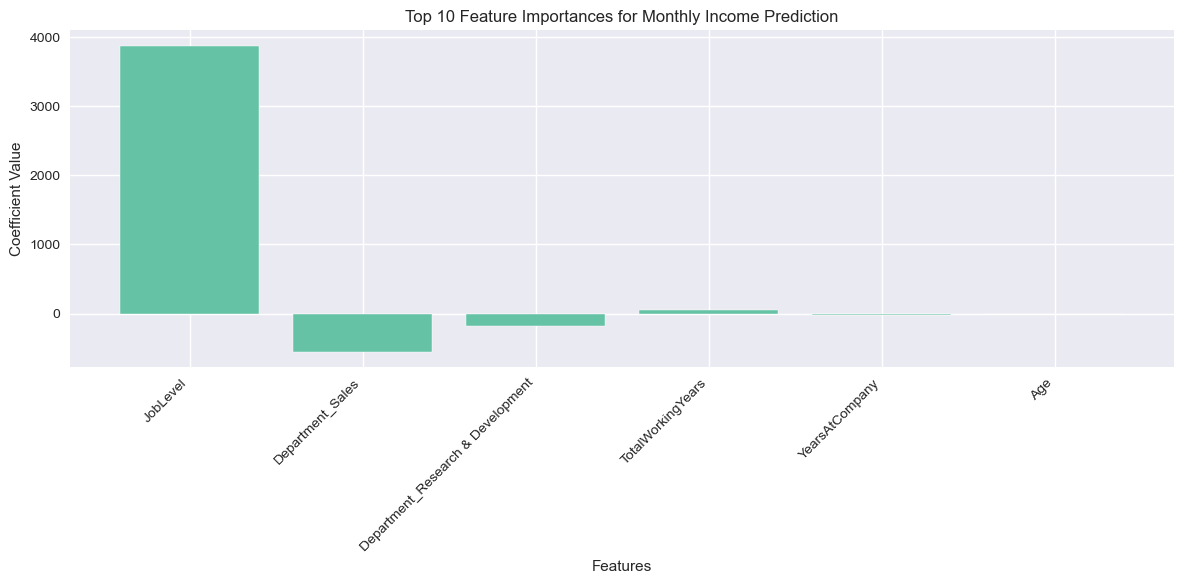

In [38]:
# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'][:10], coef_df['Coefficient'][:10])
plt.title('Top 10 Feature Importances for Monthly Income Prediction')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()

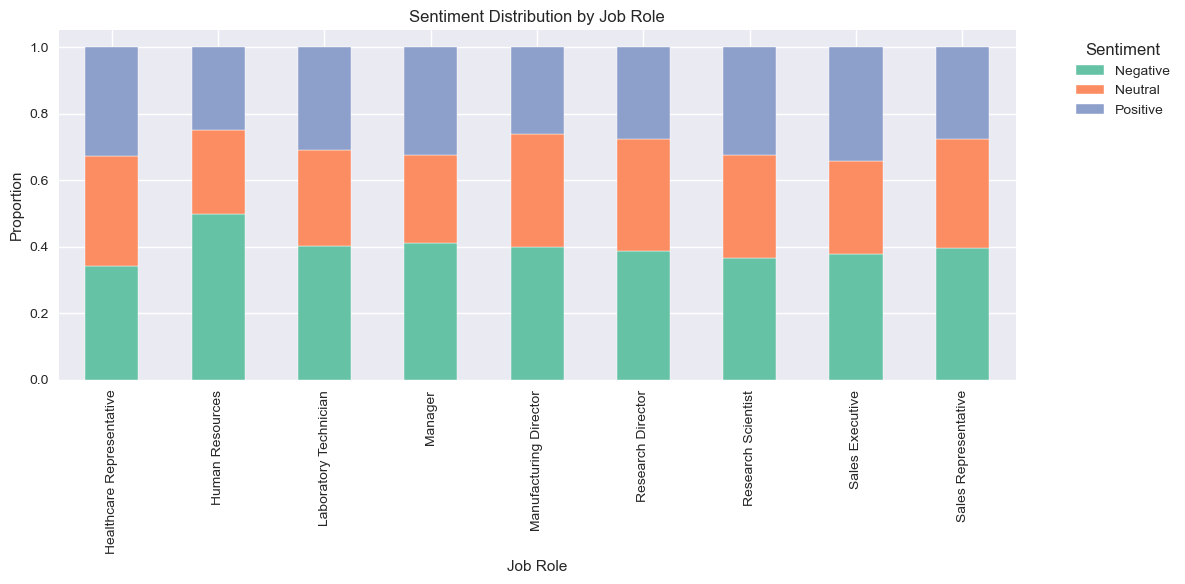

Sentiment analysis visualization saved as sentiment_by_job_role.png


In [36]:
# Visualize sentiment by job role
sentiment_by_role.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Proportion')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('sentiment_by_job_role.png')
plt.show()

print('\
Sentiment analysis visualization saved as sentiment_by_job_role.png')

# Recommendations and insights

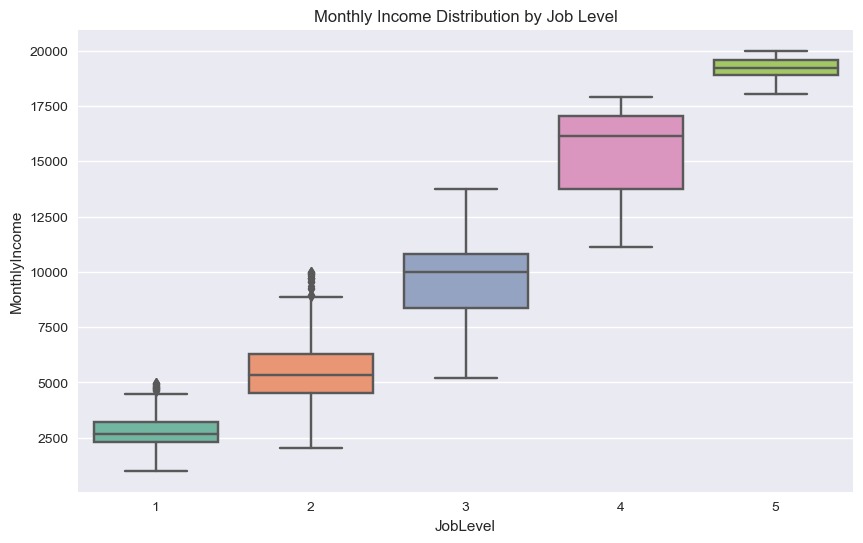

Income distribution by job level visualization saved as income_by_joblevel.png


In [48]:
# Assuming df is our main dataframe

# 1. Analyze the relationship between JobLevel and MonthlyIncome
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Job Level')
plt.savefig('income_by_joblevel.png')
plt.show()

print('Income distribution by job level visualization saved as income_by_joblevel.png')

In [41]:
# 2. Analyze attrition rates
attrition_rate = df['Attrition'].value_counts(normalize=True)
print('\
Overall Attrition Rate:')
print(attrition_rate)

Overall Attrition Rate:
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


In [42]:
# 3. Analyze attrition by department
attrition_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
print('\
Attrition Rate by Department:')
print(attrition_by_dept)

Attrition Rate by Department:
Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278


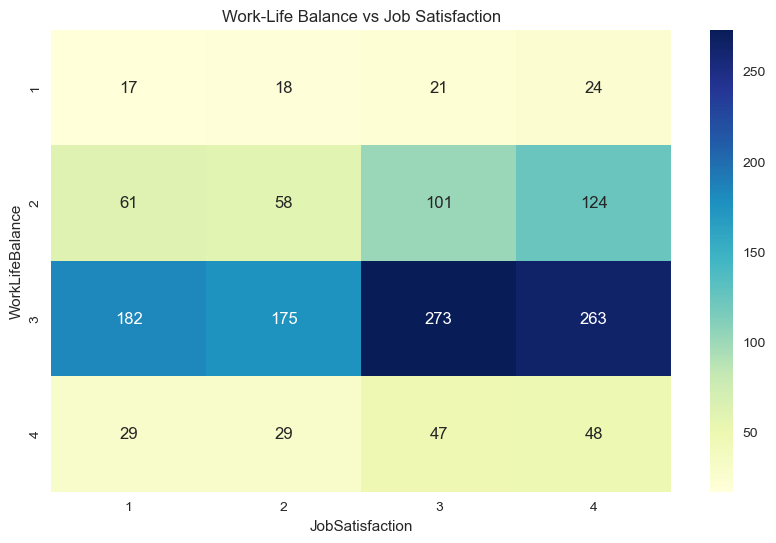

Work-life balance vs job satisfaction visualization saved as worklife_vs_satisfaction.png


In [44]:
# 4. Analyze the relationship between WorkLifeBalance and JobSatisfaction
plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(values='EmployeeCount', index='WorkLifeBalance', columns='JobSatisfaction', aggfunc='count', fill_value=0), 
            annot=True, fmt='d', cmap='YlGnBu')
plt.title('Work-Life Balance vs Job Satisfaction')
plt.savefig('worklife_vs_satisfaction.png')
plt.show()

print('Work-life balance vs job satisfaction visualization saved as worklife_vs_satisfaction.png')

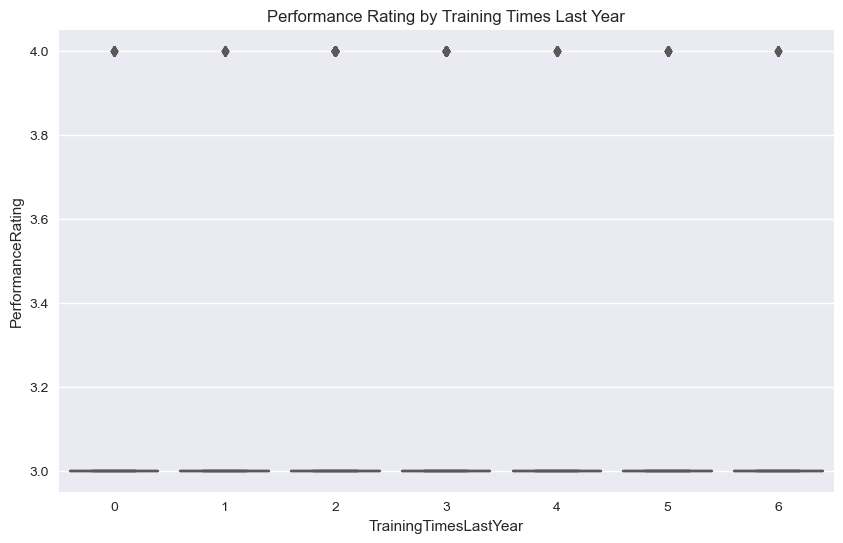

Training impact on performance visualization saved as training_vs_performance.png


In [45]:
# 5. Analyze the impact of training on performance rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='TrainingTimesLastYear', y='PerformanceRating', data=df)
plt.title('Performance Rating by Training Times Last Year')
plt.savefig('training_vs_performance.png')
plt.show()

print('Training impact on performance visualization saved as training_vs_performance.png')

In [46]:
# 6. Calculate average monthly income by education field
avg_income_by_education = df.groupby('EducationField')['MonthlyIncome'].mean().sort_values(ascending=False)
print('\
Average Monthly Income by Education Field:')
print(avg_income_by_education)

Average Monthly Income by Education Field:
EducationField
Marketing           7348.584906
Human Resources     7241.148148
Medical             6510.036638
Life Sciences       6463.288779
Other               6071.548780
Technical Degree    5758.303030
Name: MonthlyIncome, dtype: float64


In [47]:
# 7. Analyze overtime impact on work-life balance
overtime_impact = df.groupby('OverTime')['WorkLifeBalance'].mean()
print('\
Average Work-Life Balance Score by Overtime:')
print(overtime_impact)

Average Work-Life Balance Score by Overtime:
OverTime
No     2.773245
Yes    2.730769
Name: WorkLifeBalance, dtype: float64
